# Niño 3 example 

In [1]:
import waipy

### 1) Let's open  and understand NINO3 data

data from [Torrence and Compo (1993)](https://psl.noaa.gov/people/gilbert.p.compo/Torrence_compo1998.pdf)

- data description

Niño 3 SST index is defined as the seasonal SST averaged over central Pacific (5˚S-5˚N,90˚-150˚W)

Data for 1871-1996 are from an area average of the U.K.Met Office GISST2.3 (Rayner et al.1996), while data for January-June 1997 are from the Climate Prediction Center (CPC) optimmally interpolated Niño3 SST index (courtesy of D.Garrett at CPS, NOAA).



In [10]:
!ls ../../lib/waipy/data/txt

sst_nino3.dat


In [15]:
"""    OPEN ARCHIVE .TXT/.DAT
    archive = file.txt
    dt      = data sampling
    date1   = data initial time"
"""
N =504      # the time series of length N.

dt = 1/4    # amount of time between each time series value, i.e. the sampling time.
            # seasonal data 1/4 year - 4 measures in 1 year

T1 = 1871.  # start time
data,time = waipy.load_txt('../../lib/waipy/data/txt/sst_nino3.dat',dt,T1)
print (len(data))

504


### 2) Normalize data 
NORMALIZE FUNCTION by - mean/sqrt(variance)

In [17]:
data_norm = waipy.normalize(data)


### 3) CONTINUOUS  WAVELET TRANSFORM

    CONTINUOUS WAVELET TRANSFORM
    pad = 1         # pad the time series with zeroes (recommended)
    dj = 0.25       # this will do 4 sub-octaves per octave
    s0 = 2*dt       # this says start at a scale of 6 months if dt =annual
    j1 = 7/dj       # this says do 7 powers-of-two with dj sub-octaves each
    lag1 = 0.72     # lag-1 autocorrelation for red noise background
    param = 6
    mother = 'Morlet'

     PAD = if set to 1 (default is 0), pad time series with enough zeroes to get
         N up to the next higher power of 2. This prevents wraparound
         from the end of the time series to the beginning, and also
         speeds up the FFT's used to do the wavelet transform.
         This will not eliminate all edge effects (see COI below).

    DJ = the spacing between discrete scales. Default is 0.25.
         A smaller # will give better scale resolution, but be slower to plot.

    S0 = the smallest scale of the wavelet.  Default is 2*DT.

    J1 = the # of scales minus one. Scales range from S0 up to S0*2^(J1*DJ),
        to give a total of (J1+1) scales. Default is J1 = (LOG2(N DT/S0))/DJ.

    MOTHER = the mother wavelet function.
             The choices are 'MORLET', 'PAUL', or 'DOG'

    PARAM = the mother wavelet parameter.
            For 'MORLET' this is k0 (wavenumber), default is 6.
            For 'PAUL' this is m (order), default is 4.
            For 'DOG' this is m (m-th derivative), default is 2.


    PERIOD = the vector of "Fourier" periods (in time units) that corresponds
           to the SCALEs.

    SCALE = the vector of scale indices, given by S0*2^(j*DJ), j=0...J1
            where J1+1 is the total # of scales.

    COI = if specified, then return the Cone-of-Influence, which is a vector
        of N points that contains the maximum period of useful information
        at that particular time.
        Periods greater than this are subject to edge effects.
        This can be used to plot COI lines on a contour plot by doing:

              contour(time,log(period),log(power))
              plot(time,log(coi),'k')

In [20]:
pad = 1         # pad the time series with zeroes (recommended)
dj = 0.25       # this will do 4 sub-octaves per octave
s0 = 2*dt       # this says start at a scale of 6 months if dt =annual
j1 = 7/dj       # this says do 7 powers-of-two with dj sub-octaves each
lag1 = 0.72     # lag-1 autocorrelation for red noise background
param = 6
mother = 'Morlet'
dt = 1/4.

result = waipy.cwt(data_norm, dt, pad, dj, s0, j1, lag1, param, mother='Morlet',name='Nino3')
#waipy.wavelet_plot('Sine', z, data_norm, 0.03125, result)



Nr of Scales: 31
scales [0.5, 0.5946035575013605, 0.7071067811865476, 0.8408964152537145, 1.0, 1.189207115002721, 1.4142135623730951, 1.681792830507429, 2.0, 2.378414230005442, 2.8284271247461903, 3.363585661014858, 4.0, 4.756828460010884, 5.656854249492381, 6.727171322029716, 8.0, 9.513656920021768, 11.313708498984761, 13.454342644059432, 16.0, 19.027313840043536, 22.627416997969522, 26.908685288118864, 32.0, 38.05462768008707, 45.254833995939045, 53.81737057623773, 64.0, 76.10925536017415, 90.50966799187809, 107.63474115247546]


### 4) Plot Wavelet Analysis

    PLOT WAVELET TRANSFORM
    var = title name from data
    time  = vector get in load function
    data  = from normalize function
    dtmin = minimum resolution :1 octave
    result = dict from cwt function

    kwargs:
        no_plot
        filename
        xlabel_cwt
        ylabel_cwt
        ylabel_data
        plot_phase : bool, defaults to False

/Library/Python/3.8/site-packages/waipy-0.0.1.50-py3.8.egg/waipy/cwt/wavetest.py:614: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cmap.set_over('yellow')
/Library/Python/3.8/site-packages/waipy-0.0.1.50-py3.8.egg/waipy/cwt/wavetest.py:615: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cmap.set_under('cyan')
/Library/Python/3.8/site-packages/waipy-0.0.1.50-py3.8.egg/waipy/cwt/wavetest.py:616: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, yo

{'fig': <Figure size 4500x3000 with 5 Axes>,
 'ax_data': <AxesSubplot:title={'center':'NINO3 Sea Surface Temperature (seasonal)'}, ylabel='Amplitude'>,
 'ax_cwt': <AxesSubplot:xlabel='Time', ylabel='Period'>,
 'ax_wavelet': <AxesSubplot:title={'center':'$\\psi$ (t/s) Morlet in time domain'}, xlabel='Time', ylabel='Amplitude'>,
 'ax_global_spectrum': <AxesSubplot:title={'center':'Global Wavelet Spectrum'}, xlabel='Power'>}

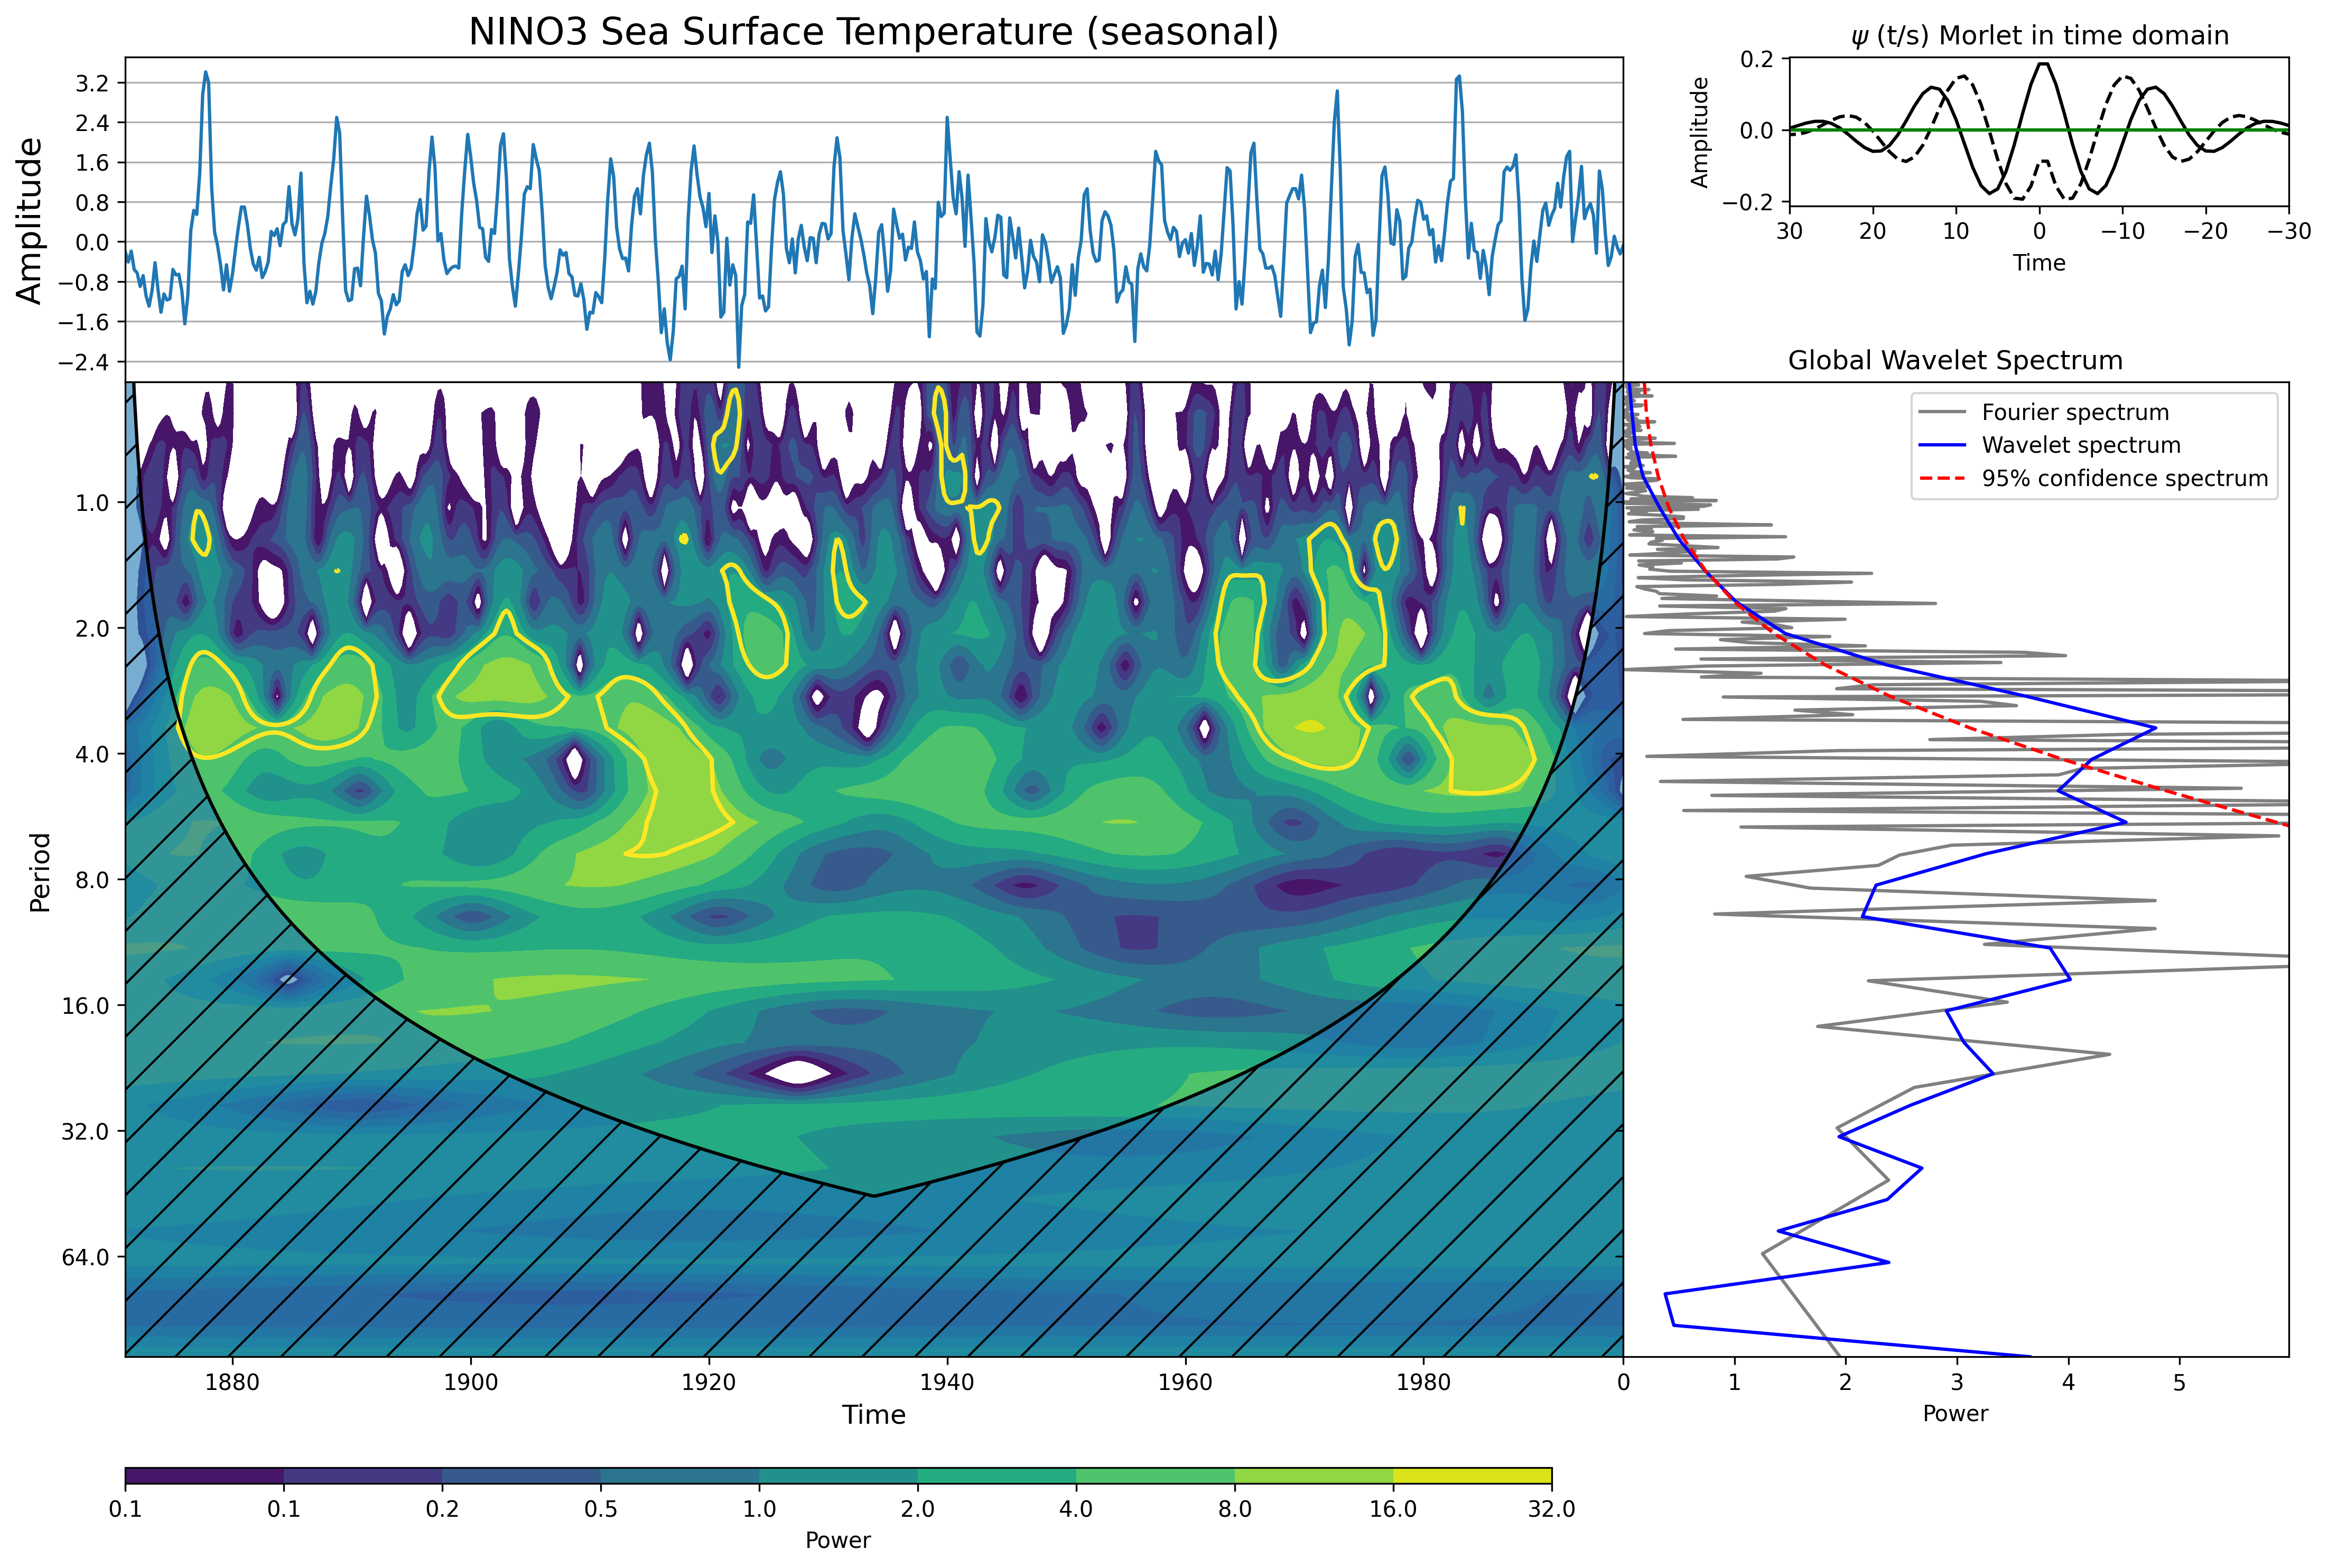

In [35]:
var='NINO3 Sea Surface Temperature (seasonal)'
#time from waipy.load_txt 
#data normalize
dtmin = 0.25/8    # dt/n of suboctaves
waipy.wavelet_plot(var, time, data_norm, dtmin, result)
